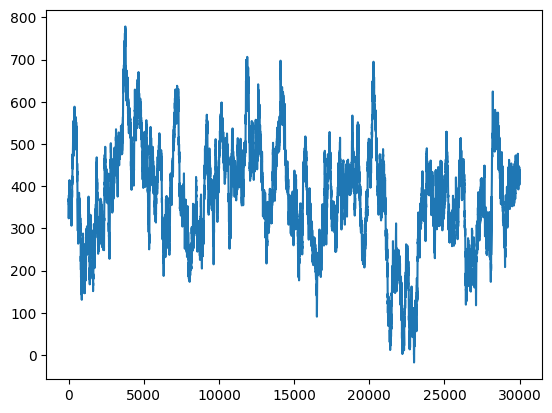

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# correlation
df0 = pd.read_csv("../data/prices_round_4_day_1.csv", sep=";")
df1 = pd.read_csv("../data/prices_round_4_day_2.csv", sep=";")
df2 = pd.read_csv("../data/prices_round_4_day_3.csv", sep=";")



df = pd.concat([df0, df1, df2], ignore_index=True)

def edge_cal(group):
    d = group.loc[group["product"] == "DIP", "mid_price"]
    b = group.loc[group["product"] == "BAGUETTE", "mid_price"]
    u = group.loc[group["product"] == "UKULELE", "mid_price"]
    pb = group.loc[group["product"] == "PICNIC_BASKET", "mid_price"]

    d_val = d.iloc[0] if not d.empty else 0
    b_val = b.iloc[0] if not b.empty else 0
    pb_val = pb.iloc[0] if not pb.empty else 0
    u_val = u.iloc[0] if not u.empty else 0
    
    edge = pb_val - 4*d_val - 2*b_val - u_val
    
    return edge


gk = df.groupby(["day", "timestamp"])[["product", "mid_price"]].apply(edge_cal).reset_index(name="edge")

plt.plot(gk["edge"])
plt.show()

(array([ 390.,  763., 1914., 4941., 7113., 7609., 4585., 1971.,  606.,
         108.]),
 array([-17.5,  62.1, 141.7, 221.3, 300.9, 380.5, 460.1, 539.7, 619.3,
        698.9, 778.5]),
 <BarContainer object of 10 artists>)

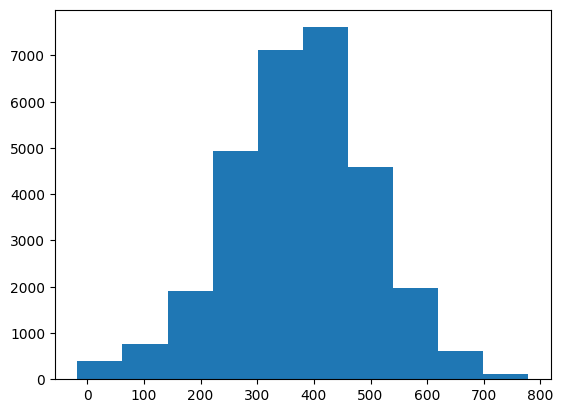

In [24]:
plt.hist(gk["edge"])